In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = pd.read_csv('/kaggle/input/indiaai-cyberguard-ai-hackathon/train.csv')


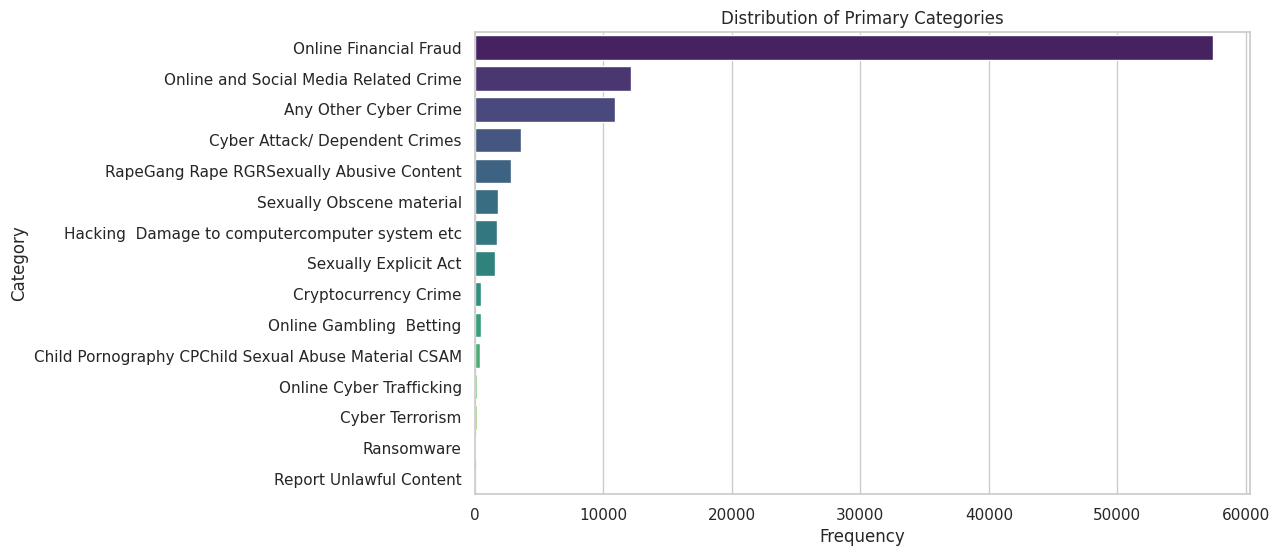

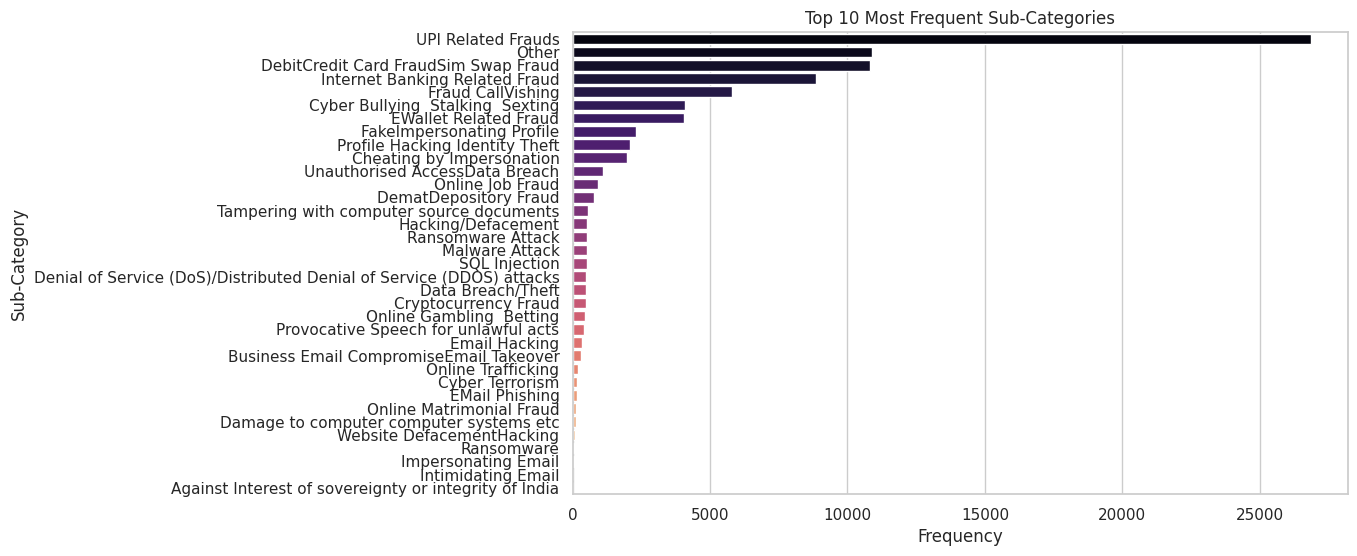

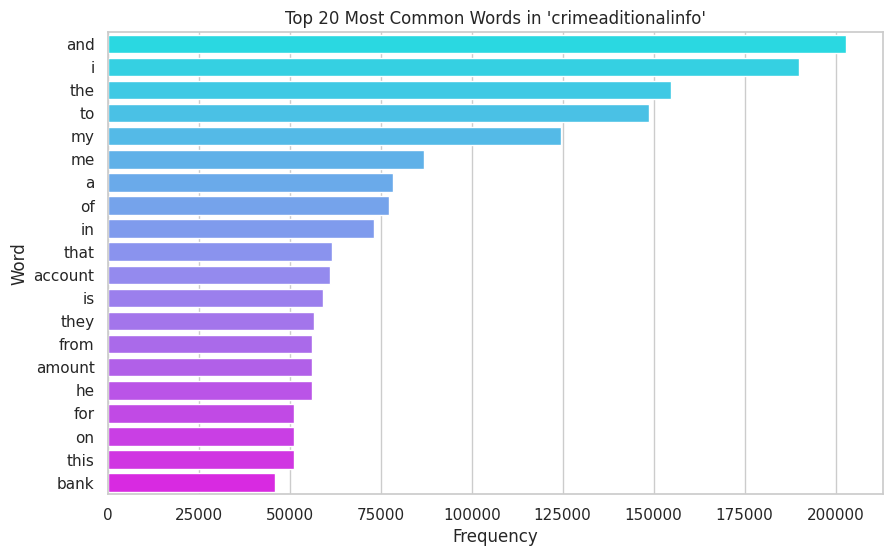

(category
 Online Financial Fraud                       57434
 Online and Social Media Related Crime        12140
 Any Other Cyber Crime                        10878
 Cyber Attack/ Dependent Crimes                3608
 RapeGang Rape RGRSexually Abusive Content     2822
 Name: count, dtype: int64,
 sub_category
 UPI Related Frauds                      26856
 Other                                   10878
 DebitCredit Card FraudSim Swap Fraud    10805
 Internet Banking Related Fraud           8872
 Fraud CallVishing                        5803
 Name: count, dtype: int64,
   Word  Frequency
 0  and     202807
 1    i     189935
 2  the     154834
 3   to     148807
 4   my     124488)

In [2]:

# Set up plot aesthetics
sns.set(style="whitegrid")

# 1. Category distribution
category_counts = data['category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(10, 6))
sns.barplot(y=category_counts.index, x=category_counts.values, palette="viridis")
plt.title("Distribution of Primary Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

# 2. Sub-category distribution (excluding missing values)
sub_category_counts = data['sub_category'].value_counts()

# Plot the sub-category distribution
plt.figure(figsize=(10, 6))
sns.barplot(y=sub_category_counts.index[:], x=sub_category_counts.values[:], palette="magma")
plt.title("Top 10 Most Frequent Sub-Categories")
plt.xlabel("Frequency")
plt.ylabel("Sub-Category")
plt.show()

# 3. Crimeaditionalinfo - Analyze common words
# Perform basic word frequency analysis on 'crimeaditionalinfo' after removing nulls
from collections import Counter
import re

# Clean and tokenize the text in 'crimeaditionalinfo'
text_data = " ".join(data['crimeaditionalinfo'].dropna())
words = re.findall(r'\b\w+\b', text_data.lower())
word_counts = Counter(words)

# Get the most common words (excluding common stopwords)
common_words = word_counts.most_common(20)

# Convert to a DataFrame for easy plotting
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot common words in 'crimeaditionalinfo'
plt.figure(figsize=(10, 6))
sns.barplot(y=common_words_df['Word'], x=common_words_df['Frequency'], palette="cool")
plt.title("Top 20 Most Common Words in 'crimeaditionalinfo'")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

category_counts.head(), sub_category_counts.head(), common_words_df.head()


# ***Missing Data Analysis***

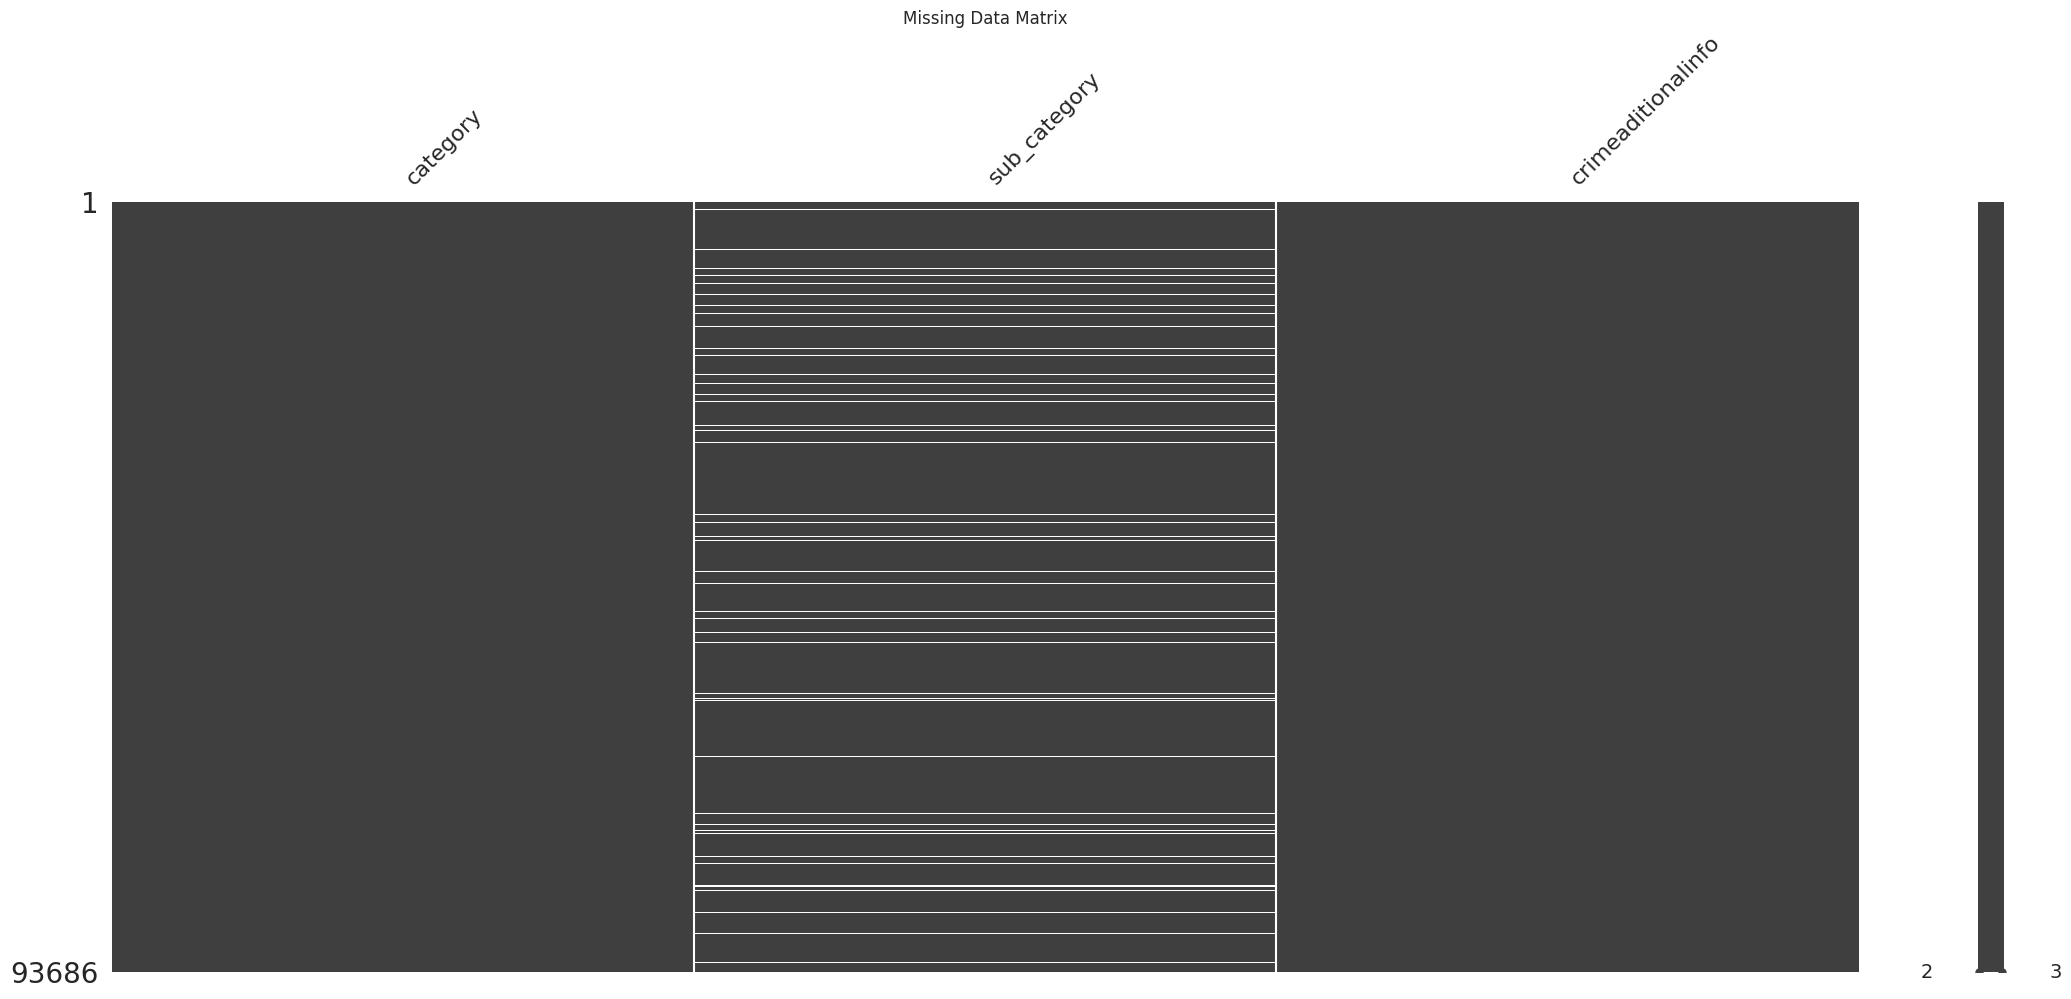

Missing values per column:
 category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64


In [3]:
import missingno as msno

# Visualize missing data
msno.matrix(data)
plt.title("Missing Data Matrix")
plt.show()

# Count missing values per column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)


# ***Category and Sub-Category Correlation Analysis***

sub_category                                    Against Interest of sovereignty or integrity of India  \
category                                                                                                
Any Other Cyber Crime                                                                           0       
Cryptocurrency Crime                                                                            0       
Cyber Attack/ Dependent Crimes                                                                  0       
Cyber Terrorism                                                                                 0       
Hacking  Damage to computercomputer system etc                                                  0       
Online Cyber Trafficking                                                                        0       
Online Financial Fraud                                                                          0       
Online Gambling  Betting                               

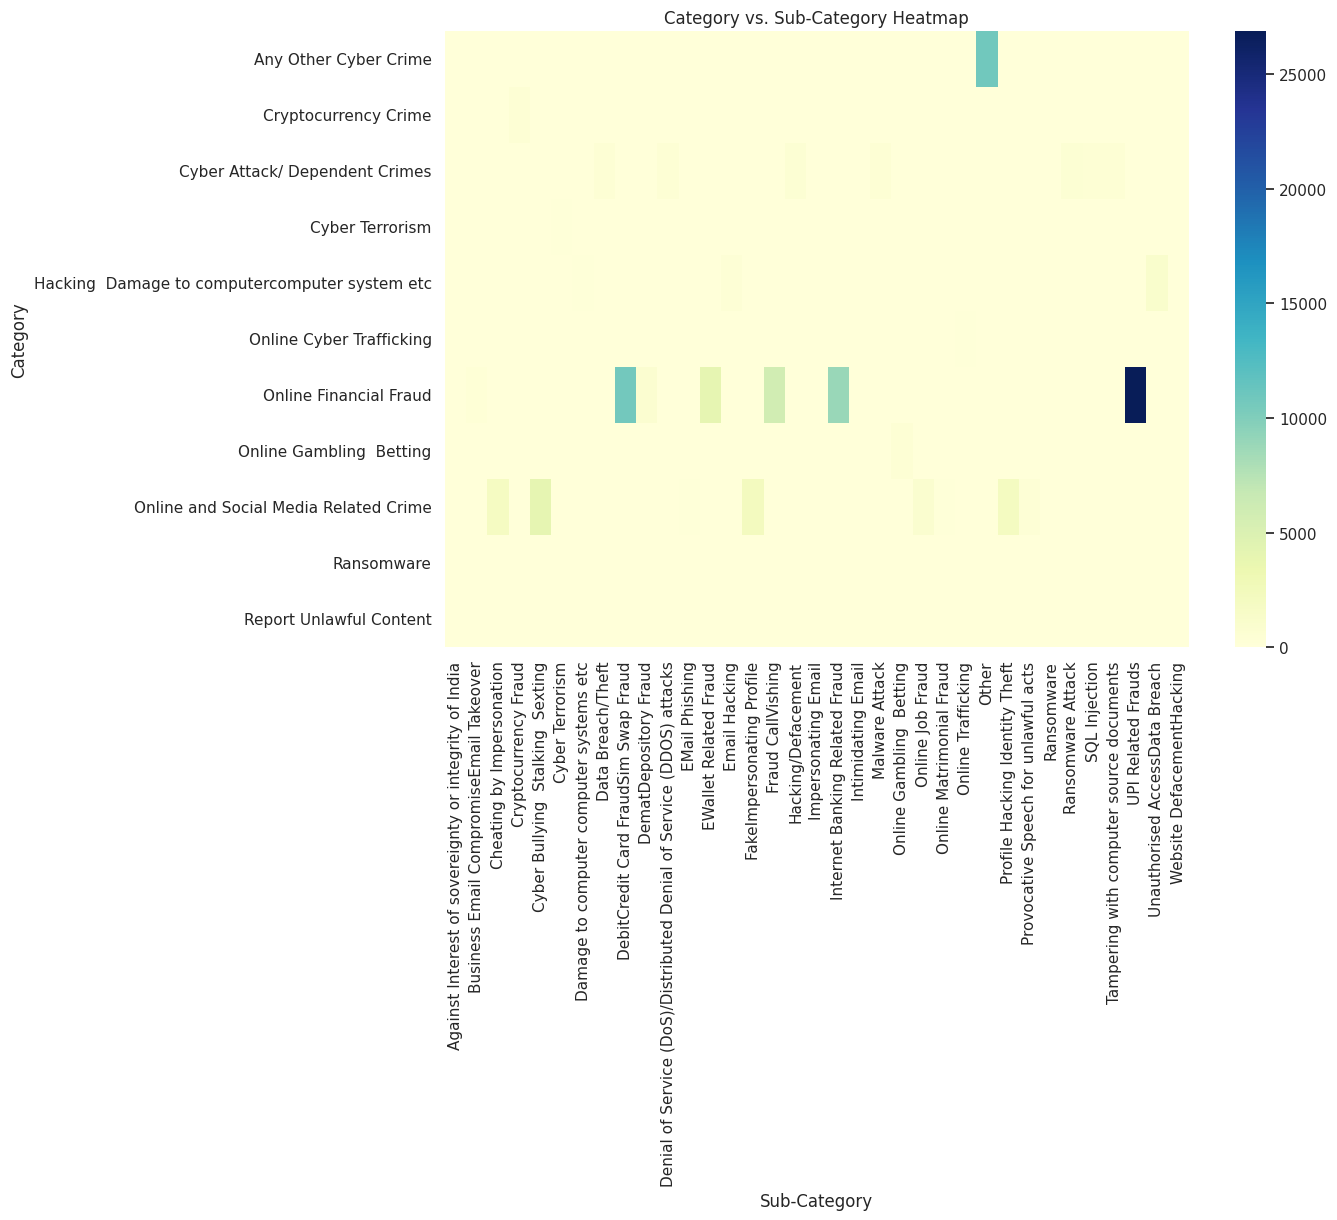

In [4]:
# Cross tabulation of 'category' and 'sub_category'
category_subcategory_crosstab = pd.crosstab(data['category'], data['sub_category'])
print(category_subcategory_crosstab)

# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(category_subcategory_crosstab, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Category vs. Sub-Category Heatmap")
plt.xlabel("Sub-Category")
plt.ylabel("Category")
plt.show()


# ***N-gram Analysis***

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

# Create bigrams and trigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
ngrams = vectorizer.fit_transform(data['crimeaditionalinfo'].dropna())

# Sum up frequencies of each n-gram and display top 10
ngram_counts = ngrams.sum(axis=0).A1
ngram_freq = dict(zip(vectorizer.get_feature_names_out(), ngram_counts))
top_ngrams = sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top n-grams:", top_ngrams)


Top n-grams: [('necessary action', 9998), ('bank account', 9616), ('account necessary', 9092), ('account necessary action', 8930), ('account number', 8929), ('reverse total', 8456), ('hold reverse', 8449), ('hold reverse total', 8447), ('complaint account', 8413), ('complaint account necessary', 8368)]


# ***Sentiment Analysis***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


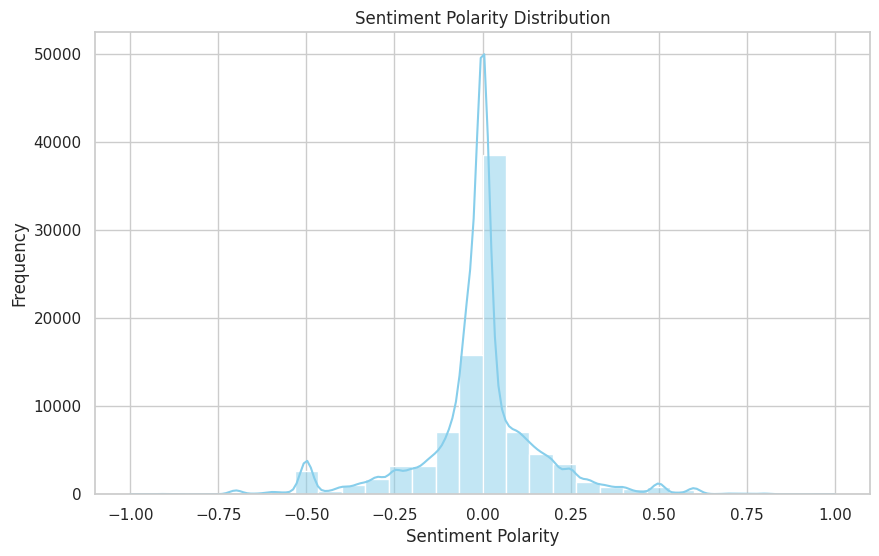

In [6]:
from textblob import TextBlob

# Calculate sentiment polarity for each entry in 'crimeaditionalinfo'
data['sentiment'] = data['crimeaditionalinfo'].dropna().apply(lambda text: TextBlob(text).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'].dropna(), kde=True, bins=30, color="skyblue")
plt.title("Sentiment Polarity Distribution")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


# ***Topic Modeling***

In [7]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['crimeaditionalinfo'].dropna())

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(tfidf_matrix)

# Display top words in each topic
n_top_words = 10
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx+1}:")
    print([tfidf.get_feature_names_out()[i] for i in topic.argsort()[:-n_top_words - 1:-1]])


Topic 1:
['financial', 'fraud', 'like', 'email', 'anymore', 'fix', 'online', 'stange', 'don', 'got']
Topic 2:
['hai', 'se', 'ki', 'ke', 'mere', 'kar', 'aur', 'ka', 'ko', 'kiya']
Topic 3:
['money', 'number', 'account', 'rs', 'loan', 'card', 'got', 'asked', 'pay', 'person']
Topic 4:
['total', 'bank', 'fraud', 'account', 'necessary', 'hold', 'reverse', 'action', 'complaint', 'upi']
Topic 5:
['area', 'mall', 'activities', 'shamefull', 'time', 'involve', 'places', 'gariahat', 'date', 'pm']


# ***Named Entity Recognition (NER)***

In [8]:
import spacy

# Load pre-trained NLP model
nlp = spacy.load("en_core_web_sm")

# Apply NER on sample data and extract named entities
sample_text = data['crimeaditionalinfo'].dropna().sample(5).tolist()
for text in sample_text:
    doc = nlp(text)
    print("Text:", text)
    print("Entities:", [(ent.text, ent.label_) for ent in doc.ents])
    print("\n")


Text: FRAUD THROUGH  UPI FRAUD  PHONE PE  
BANK  		Punjab National Bank including Oriental Bank of Commerce and United Bank of India			
ACCOUNT NUMBER  

TOTAL AMOUNT  

PLEASE HOLD  REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION 

Entities: [('FRAUD THROUGH  ', 'ORG'), ('UPI', 'ORG'), ('PHONE', 'ORG'), ('Punjab National Bank', 'ORG'), ('Oriental Bank of Commerce', 'ORG'), ('United Bank of India', 'ORG'), ('COMPLAINT', 'ORG'), ('NECESSARY', 'GPE')]


Text: In the name of buying books they offered a least amount and after complete payment they are asking for more and not returning my money This happened today and I immediately asked him to return within an hour and he gave no response after that
Entities: [('today', 'DATE'), ('an hour', 'TIME')]


Text: One person is sending nude photos to girl Girl is Under  and sending her nude photos and abusing messages Same Thing he did before  months before that time when i contacted him he said i dont know this girl and i

# ***Temporal Analysis***

In [9]:
# Example: Extract dates if present in 'crimeaditionalinfo' using regex
data['extracted_dates'] = data['crimeaditionalinfo'].str.extract(r'(\d{2,4}[-/]\d{2}[-/]\d{2,4})')

# Count entries by extracted dates (after dropping NaNs)
date_counts = data['extracted_dates'].dropna().value_counts()
print("Date frequency distribution:\n", date_counts.head(10))


Date frequency distribution:
 Series([], Name: count, dtype: int64)


# ***Text Similarity and Clustering***

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Drop rows where 'crimeaditionalinfo' is NaN and reset the index
data_cleaned = data.dropna(subset=['crimeaditionalinfo']).reset_index(drop=True)

# Vectorize the non-null text for clustering
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data_cleaned['crimeaditionalinfo'])

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=0)
data_cleaned['cluster'] = kmeans.fit_predict(tfidf_matrix)

# Merge the clustering results back to the original data
data = data.merge(data_cleaned[['crimeaditionalinfo', 'cluster']], on='crimeaditionalinfo', how='left')

# Display sample clusters
print(data[['crimeaditionalinfo', 'cluster']].sample(5))


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                        crimeaditionalinfo  cluster
1114757  Respected Sir\r\n\r\nA very serious matter I w...      4.0
1719828  Respected Sir\r\n\r\nA very serious matter I w...      4.0
4683184  Respected Sir\r\n\r\nA very serious matter I w...      4.0
2152171  Respected Sir\r\n\r\nA very serious matter I w...      4.0
57958    Respected Sir\r\n\r\nA very serious matter I w...      4.0


In [11]:
# Display a few sample points from each cluster
for cluster_num in range(5):  # Adjust number of clusters if needed
    print(f"\nCluster {cluster_num} samples:")
    cluster_samples = data[data['cluster'] == cluster_num]['crimeaditionalinfo'].sample(5, random_state=0)
    print(cluster_samples.values)



Cluster 0 samples:
['fraudster called me by becoming an army member he told me he is paying but he send me link and paid me  rs after that he sent me link for recieving payment i clicked on link and then my money got deducted'
 'Fraudulent transaction'
 '                             \r\n   \r\ncall aaya the no \r\n       '
 'i had beated and did payment of   once i win they didnt give me money please help'
 'Fraudulent transaction ']

Cluster 1 samples:
['TOTAL RS  UPI FRAUD' 'UPI FRAUD TOTAL AMOUNT ' 'UPI FRAUD TOTAL AMOUNT '
 'FRAUD THROUGH   Debit Card\r\nBANK  STATE BANK OF INDIA \r\nACCOUNT NO     \r\nTOTAL AMOUNT    \r\nPLEASE HOLD REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION\r\n'
 'FRAUD THROUGH  UPI FRAUD PHONE PE\r\nBANK  Punjab National Bank including Oriental Bank of Commerce and United Bank of India\t\r\nACCOUNT NUMBER \t\r\nTOTAL AMOUNT  \r\nPLEASE HOLD  REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION']

Cluster 2 samples

In [12]:
data_cleaned

,category,sub_category,crimeaditionalinfo,sentiment,extracted_dates,cluster
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...,-0.140000,NaN,0
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...,-0.156250,NaN,0
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...,0.066667,NaN,0
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...,0.171429,NaN,0
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...,0.136364,NaN,0
...,...,...,...,...,...,...
93660,Online Financial Fraud,Internet Banking Related Fraud,Identity theft Smishing SMS Fraud CreditDeb...,-0.075000,NaN,0
93661,Online Financial Fraud,EWallet Related Fraud,RECEIVED CALL FROM NUMBER ASKING ABOUT phone ...,0.000000,NaN,0
93662,Online Financial Fraud,UPI Related Frauds,Cyber Stalking Blackmailing PhoneSMSVOIP C...,-0.075000,NaN,0
93663,Online and Social Media Related Crime,Online Matrimonial Fraud,Call karke bola ki aapka lotary laga ha aru AC...,0.000000,NaN,0


# Severity and Frequency Analysis

# ***TF-IDF Analysis***

In [13]:
# Calculate TF-IDF and display top terms
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['crimeaditionalinfo'].dropna())
tfidf_scores = dict(zip(tfidf.get_feature_names_out(), tfidf_matrix.sum(axis=0).A1))
top_terms = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top TF-IDF Terms:", top_terms)


Top TF-IDF Terms: [('area', 2649369.61634764), ('mall', 1655877.1869392989), ('shamefull', 1324737.87609835), ('activities', 1324662.694246054), ('gariahat', 993553.7249406383), ('places', 993545.6769772797), ('involve', 993543.141478069), ('subhro', 662369.1500905345), ('saha', 662366.8125994107), ('park', 662354.5282002614)]
